In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('input/Pokemon.csv', index_col=0, encoding = "ISO-8859-1")

In [14]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


(0, 190.44212186867063)

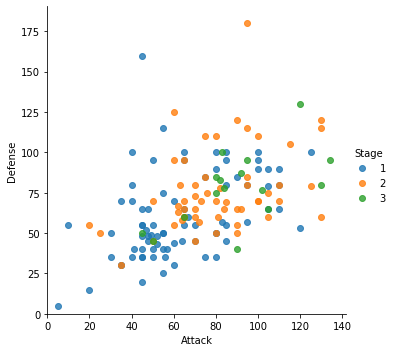

In [23]:
# Recommended
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Stage')
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

# Tweak using Matplotlib
plt.xlim(0, None)
plt.ylim(0, None)

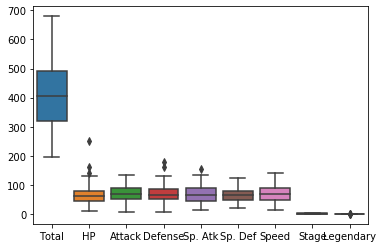

In [24]:
sns.boxplot(data=df)

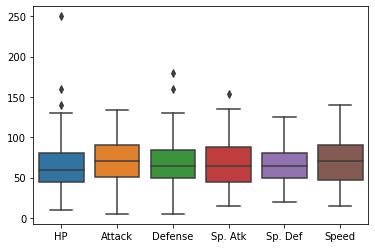

In [27]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

sns.boxplot(data=stats_df)

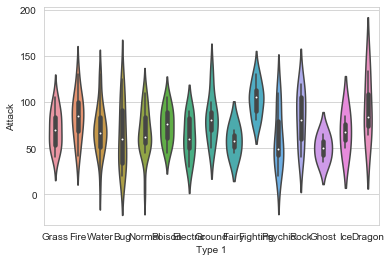

In [32]:
sns.set_style('whitegrid')

sns.violinplot(x='Type 1', y='Attack', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

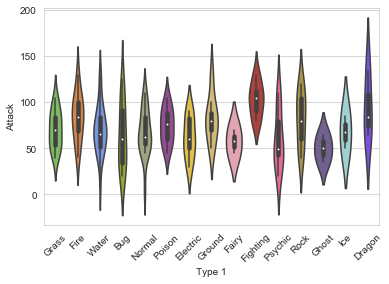

In [34]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]


sns.violinplot(x='Type 1', y='Attack', data=df,
               palette=pkmn_type_colors)

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

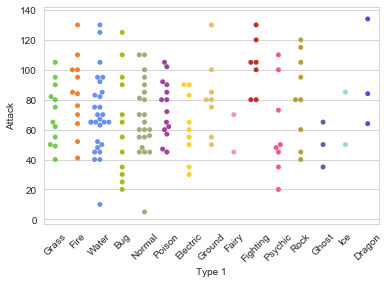

In [38]:
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Attack by Type')

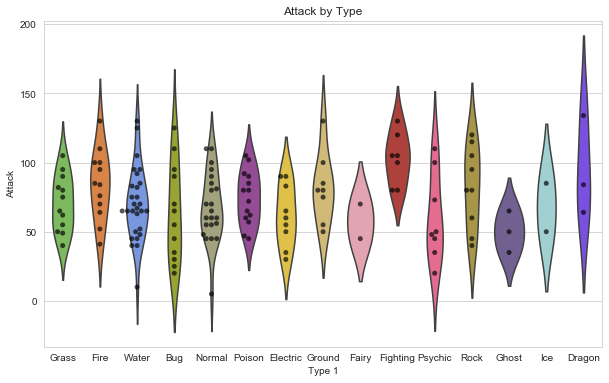

In [43]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k',
              alpha=0.67)

plt.title('Attack by Type')

In [44]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [45]:
melted_df = pd.melt(stats_df,
                    id_vars=['Name', 'Type 1', 'Type 2'], # Variables to keep
                    var_name='Stat') # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [47]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


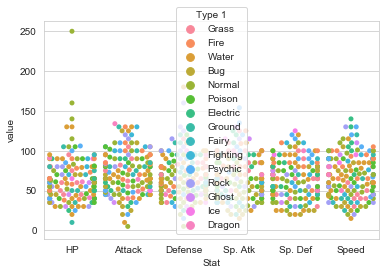

In [48]:
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')

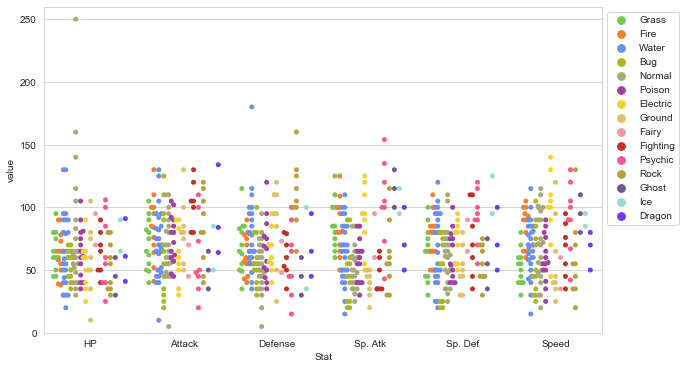

In [50]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1',
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette

# 4. Adjust the y-axis
plt.ylim(0, 260) 

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

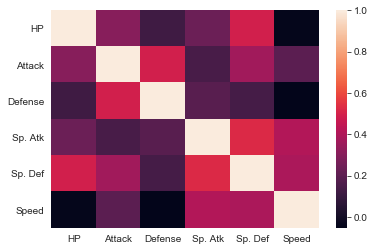

In [52]:
# Heatmaps help you visualize matrix-like data.
corr = stats_df.corr()

sns.heatmap(corr)

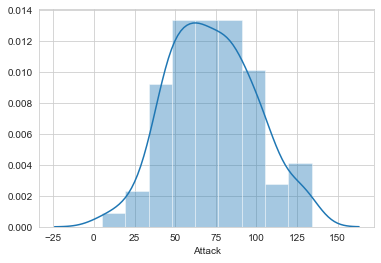

In [53]:
# Histograms allow you to plot the distributions of numeric variables.
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

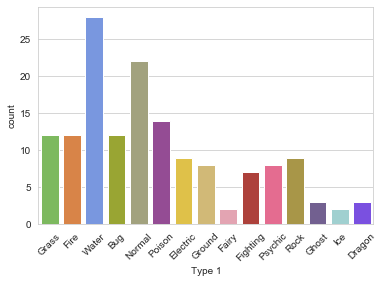

In [55]:
# Bar plots help you visualize the distributions of categorical variables.
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=45)

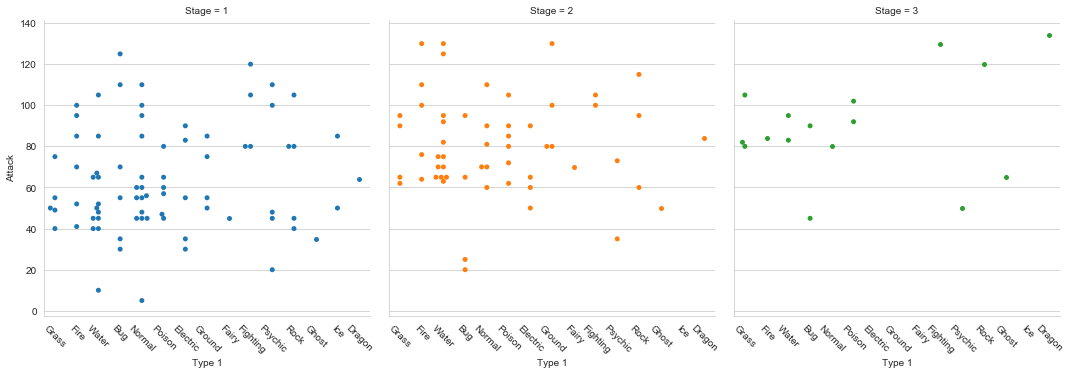

In [57]:
# Factor plots make it easy to separate plots by categorical classes.
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

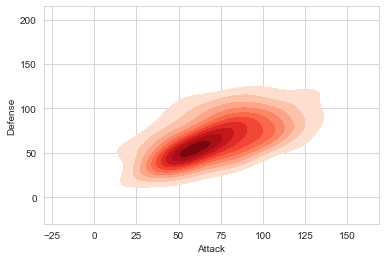

In [62]:
# Density plots display the distribution between two variables.
# Tip: Consider overlaying this with a scatter plot.

sns.kdeplot(df.Attack, df.Defense,
            cmap="Reds", shade_lowest=False,
            shade=True)

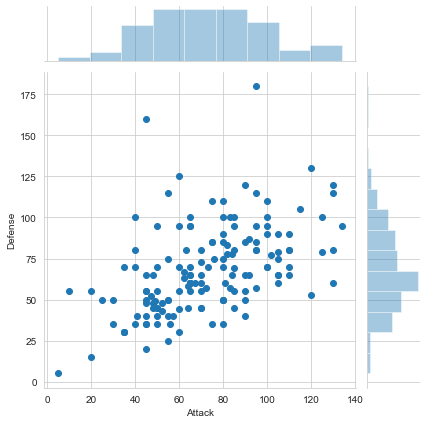

In [59]:
# Joint Distribution Plot

sns.jointplot(x='Attack', y='Defense', data=df)